# Import 

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import h5py
import tables
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Global variables 

In [2]:
SummerSchool_PATH='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018/'

In [3]:
study_1='study_1'
study_2='study_2'

In [4]:
HASE_PATH='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018/hase/'

# Data QC 

## Check partial derivatives

### Study 1

In [5]:
#Check Partial Derivatives
b_cov_study_1=np.load('{}/{}/partDer/{}_b_cov.npy'.format(SummerSchool_PATH,study_1,study_1))
C_study_1=np.load('{}/{}/partDer/{}_C.npy'.format(SummerSchool_PATH,study_1,study_1))
a_cov_study_1=np.load('{}/{}/partDer/{}_a_cov.npy'.format(SummerSchool_PATH,study_1,study_1))
a_test_study_1=np.load('{}/{}/partDer/{}_a_test.npy'.format(SummerSchool_PATH,study_1,study_1))
metadata_study_1=np.load('{}/{}/partDer/{}_metadata.npy'.format(SummerSchool_PATH,study_1,study_1)).item()
print 'b_cov',b_cov_study_1.shape
print 'a_test',a_test_study_1.shape
print 'C',C_study_1.shape
print metadata_study_1.keys()
print a_cov_study_1/a_cov_study_1[0,0]
print 'Samples zise: ', a_cov_study_1[0,0]
print 'Diff MAF',np.sum(a_test_study_1[:,0] / a_cov_study_1[0,0] /2 - metadata_study_1['MAF'])

b_cov (4, 13260)
a_test (50000, 5)
C (13260,)
['filter', 'id', 'MAF', 'phenotype', 'names']
[[  1.00000000e+00   4.93000000e-01   7.01270180e+01   1.59351231e+02]
 [  4.93000000e-01   4.93000000e-01   3.45281132e+01   7.80408766e+01]
 [  7.01270180e+01   3.45281132e+01   4.94983764e+03   1.11719394e+04]
 [  1.59351231e+02   7.80408766e+01   1.11719394e+04   2.57973545e+04]]
Samples zise:  1000.0
Diff MAF 0.0


In [6]:
phenotype_mean_study_1=b_cov_study_1[0,:]/ a_cov_study_1[0,0]

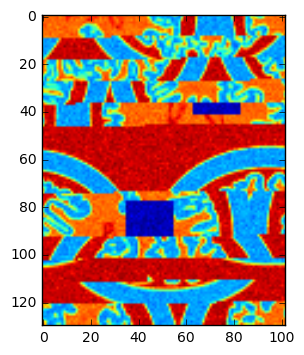

In [7]:
plt.imshow(phenotype_mean_study_1.reshape(130,102));

In [8]:
metadata_study_1['phenotype'][:10]

['phen_7578',
 'phen_7579',
 'phen_7580',
 'phen_7581',
 'phen_7582',
 'phen_7583',
 'phen_7584',
 'phen_7585',
 'phen_7586',
 'phen_7587']

In [9]:
save_order_study_1=np.array(metadata_study_1['phenotype'])
order_study_1=[np.where(save_order_study_1=='phen_{}'.format(i))[0] for i in range(13260)   ]

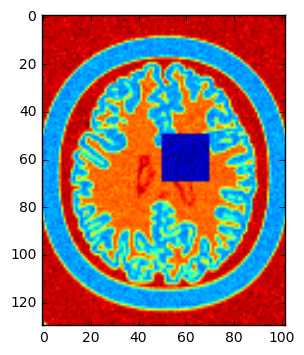

In [10]:
plt.imshow(phenotype_mean_study_1[order_study_1].reshape(130,102));

We need to exclude phenotypes with **incorrect** values

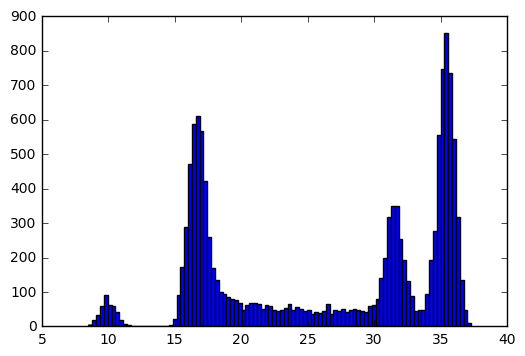

In [11]:
plt.hist(phenotype_mean_study_1,100 );

Looks like the threshold is around 12.

In [12]:
exclude_indices_study_1=np.where(phenotype_mean_study_1<12)[0]
print exclude_indices_study_1.shape

(400,)


In [15]:
exclude_phenotypes_study_1=np.array(metadata_study_1['phenotype'])[exclude_indices_study_1]
exclude_phenotypes_study_1[:10]

array(['phen_6680', 'phen_6681', 'phen_6682', 'phen_6683', 'phen_6684',
       'phen_6685', 'phen_6686', 'phen_6687', 'phen_6688', 'phen_6689'], 
      dtype='|S10')

In [16]:
pd.DataFrame({'ID':exclude_phenotypes_study_1}).to_csv('{}/exclude_phenotypes.txt'.format(SummerSchool_PATH),index=None, sep=' ')

In [17]:
print metadata_study_1['names']
print (a_cov_study_1/a_cov_study_1[0,0])[:,0]

['study_1_intercept', 'study_1_sex', 'study_1_age', 'study_1_height']
[   1.            0.493        70.12701799  159.35123087]


### Study 2

In [18]:
#Check Partial Derivatives
b_cov_study_2=np.load('{}/{}/partDer/{}_b_cov.npy'.format(SummerSchool_PATH,study_2,study_2))
C_study_2=np.load('{}/{}/partDer/{}_C.npy'.format(SummerSchool_PATH,study_2,study_2))
a_cov_study_2=np.load('{}/{}/partDer/{}_a_cov.npy'.format(SummerSchool_PATH,study_2,study_2))
a_test_study_2=np.load('{}/{}/partDer/{}_a_test.npy'.format(SummerSchool_PATH,study_2,study_2))
metadata_study_2=np.load('{}/{}/partDer/{}_metadata.npy'.format(SummerSchool_PATH,study_2,study_2)).item()
print 'b_cov',b_cov_study_2.shape
print 'a_test',a_test_study_2.shape
print 'C',C_study_2.shape
print metadata_study_2.keys()
print a_cov_study_2/a_cov_study_2[0,0]
print 'Samples zise: ', a_cov_study_2[0,0]
print 'Diff MAF',np.sum(a_test_study_2[:,0] / a_cov_study_2[0,0] /2 - metadata_study_2['MAF'])

b_cov (4, 13260)
a_test (50000, 5)
C (13260,)
['filter', 'id', 'MAF', 'phenotype', 'names']
[[  1.00000000e+00   5.36666667e-01   4.99801456e+01   1.59429317e+02]
 [  5.36666667e-01   5.36666667e-01   2.68684268e+01   8.53610852e+01]
 [  4.99801456e+01   2.68684268e+01   2.53122402e+03   7.96993716e+03]
 [  1.59429317e+02   8.53610852e+01   7.96993716e+03   2.58238899e+04]]
Samples zise:  1200.0
Diff MAF 0.0


In [19]:
phenotype_mean_study_2=b_cov_study_2[0,:]/ a_cov_study_2[0,0]

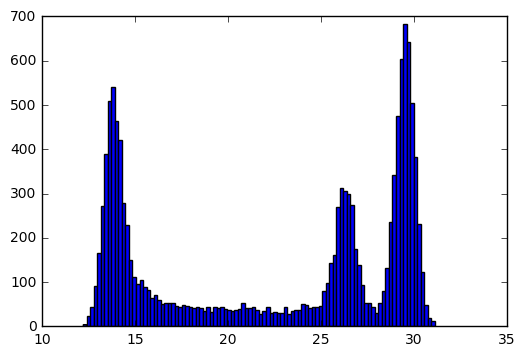

In [20]:
plt.hist(phenotype_mean_study_2,100 );

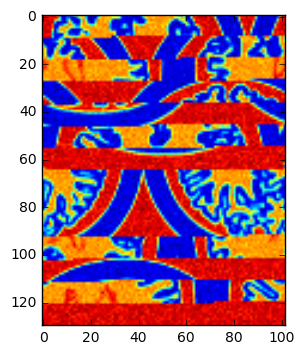

In [21]:
plt.imshow(phenotype_mean_study_2.reshape(130,102));

In [22]:
metadata_study_2['phenotype'][:10]

['phen_3790',
 'phen_3791',
 'phen_3792',
 'phen_3793',
 'phen_3794',
 'phen_3795',
 'phen_3796',
 'phen_3797',
 'phen_3798',
 'phen_3799']

In [23]:
save_order_study_2=np.array(metadata_study_2['phenotype'])
order_study_2=[np.where(save_order_study_2=='phen_{}'.format(i))[0] for i in range(13260)   ]

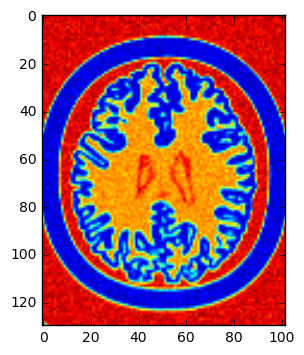

In [25]:
plt.imshow(phenotype_mean_study_2[order_study_2].reshape(130,102));

In [26]:
print metadata_study_2['names']
print (a_cov_study_2/a_cov_study_2[0,0])[:,0]

['study_2_intercept', 'study_2_sex', 'study_2_age', 'study_2_height']
[   1.            0.53666667   49.98014562  159.42931681]


# Run HASE for HD MA GWAS 

# Prepare folders

## Make encoded study

In [45]:
%%sh -s "$study_1" "$SummerSchool_PATH" "$HASE_PATH"

i=$1
DATA_PATH=$2
HASE_PATH=$3


mkdir -p ${DATA_PATH}/${i}//encode/study/genotype/
mkdir -p ${DATA_PATH}/${i}//encode/study/probes/
mkdir -p ${DATA_PATH}/${i}//encode/study/individuals/

mv ${DATA_PATH}/${i}/encode/encode_genotype/* ${DATA_PATH}/${i}/encode/study/genotype/
mv ${DATA_PATH}/${i}/encode/encode_individuals/* ${DATA_PATH}/${i}/encode/study/individuals/
cp ${DATA_PATH}/${i}/${i}/probes/* ${DATA_PATH}/${i}/encode/study/probes/



study_1


In [46]:
%%sh -s "$study_2" "$SummerSchool_PATH" "$HASE_PATH"

i=$1
DATA_PATH=$2
HASE_PATH=$3

mkdir -p ${DATA_PATH}/${i}//encode/study/
mkdir -p ${DATA_PATH}/${i}//encode/study/genotype/
mkdir -p ${DATA_PATH}/${i}//encode/study/probes/
mkdir -p ${DATA_PATH}/${i}//encode/study/individuals/

mv ${DATA_PATH}/${i}/encode/encode_genotype/* ${DATA_PATH}/${i}/encode/study/genotype/
mv ${DATA_PATH}/${i}/encode/encode_individuals/* ${DATA_PATH}/${i}/encode/study/individuals/
cp ${DATA_PATH}/${i}/${i}/probes/* ${DATA_PATH}/${i}/encode/study/probes/


## Make global mapper 

In [54]:
%%sh -s "$study_1" "$study_2" "$SummerSchool_PATH" "$HASE_PATH"

s1=$1
s2=$2
DATA_PATH=$3
HASE_PATH=$4


mkdir -p ${DATA_PATH}/MA_mapper/

ln -s ${DATA_PATH}/${s1}/mapper/values_1000Gp1v3_ref_${s1}.npy ${DATA_PATH}/MA_mapper/
ln -s ${DATA_PATH}/${s2}/mapper/values_1000Gp1v3_ref_${s2}.npy ${DATA_PATH}/MA_mapper/

ln -s ${DATA_PATH}/${s1}/mapper/flip_1000Gp1v3_ref_${s1}.npy ${DATA_PATH}/MA_mapper/
ln -s ${DATA_PATH}/${s2}/mapper/flip_1000Gp1v3_ref_${s2}.npy ${DATA_PATH}/MA_mapper/

ln -s ${DATA_PATH}/${s2}/mapper/keys_1000Gp1v3_ref.npy ${DATA_PATH}/MA_mapper/


## Clean partial derivatives folder

In [56]:
%%sh -s "$study_1" "$study_2" "$SummerSchool_PATH" "$HASE_PATH"

s1=$1
s2=$2
DATA_PATH=$3
HASE_PATH=$4

rm ${DATA_PATH}/${s1}/partDer/*txt
rm ${DATA_PATH}/${s2}/partDer/*txt

# Run HD MA

In [59]:
%%sh -s "$study_1" "$study_2" "$SummerSchool_PATH" "$HASE_PATH"

s1=$1
s2=$2
DATA_PATH=$3
HASE_PATH=$4


python  ${HASE_PATH}/hase.py -mode meta-stage \
-th 6.5 \
-o ${DATA_PATH}/HD_MA/ \
-g ${DATA_PATH}/${s1}//encode/study/ ${DATA_PATH}/${s2}/encode/study/ \
-ph ${DATA_PATH}/${s1}/encode/encode_phenotype/ ${DATA_PATH}/${s2}/encode/encode_phenotype/ \
-derivatives ${DATA_PATH}/${s1}/partDer/ ${DATA_PATH}/${s2}/partDer/  \
-study_name ${s1} ${s2} \
-maf 0 \
-mapper ${DATA_PATH}/MA_mapper/ \
-encoded 1 1 \
-ph_id_exc ${DATA_PATH}/exclude_phenotypes.txt \
-snp_id_inc ${DATA_PATH}/include_rsid.txt





Process is terminated.


# MA summary 

In [65]:
%%sh -s "$SummerSchool_PATH" "$HASE_PATH"

DATA_PATH=$1
HASE_PATH=$2

mkdir -p ${DATA_PATH}/MA_summary/

python ${HASE_PATH}/tools/analyzer.py -r ${DATA_PATH}/HD_MA/ -o ${DATA_PATH}/MA_summary/

head ${DATA_PATH}/MA_summary//results.csv


Namespace(df=None, out='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//MA_summary/', r='/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//HD_MA/')
DF is not defined. Forced to use z_score statistics!
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//HD_MA/2result.npy
/scratch/groshchupkin/Students/Cognomics_SummerSchool_2018//HD_MA/1result.npy
Saving data...
DF is not defined. Forced to use z_score statistics!
RSID p_value t-stat phenotype SE MAF BETA
rs4723256 0.0 -47.0739330631 phen_9353 37.7218863021 0.818636363636 -1775.7175508
rs4723256 0.0 -47.0656547066 phen_9354 37.6928391059 0.818636363636 -1774.03815027
rs4723256 0.0 -47.085071864 phen_9355 35.3077037464 0.818636363636 -1662.46576825
rs4723256 0.0 -46.86318182 phen_9356 127.293144317 0.818636363636 -5965.36176657
rs4723256 0.0 -46.8608005979 phen_9357 110.889750541 0.818636363636 -5196.38248847
rs4723256 0.0 46.8699944798 phen_9358 76.2513231496 0.818636363636 3573.8990951
rs4723256 0.0 -47.04